# Sistema Fuzzy para Controle de Temperatura de Chuveiro

## 1. Descrição do Problema

Este notebook implementa um sistema baseado em regras fuzzy para controlar a temperatura de um chuveiro. O objetivo é ajustar a abertura da válvula de água quente com base na temperatura atual e no fluxo de água.

### Variáveis do sistema:

1. **Entradas:**
   - Temperatura (baixa, média, alta)
   - Fluxo de água (baixo, médio, alto)

2. **Saída:**
   - Abertura da válvula (pequena, moderada, grande)

## 2. Modelagem do Sistema Fuzzy

Vamos usar a biblioteca Scikit-Fuzzy para implementar nosso sistema. Primeiro, importamos as bibliotecas necessárias e definimos os universos de discurso para nossas variáveis.

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Universos de discurso
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
fluxo = ctrl.Antecedent(np.arange(0, 101, 1), 'fluxo')
abertura = ctrl.Consequent(np.arange(0, 101, 1), 'abertura')

Agora, definimos as funções de pertinência para cada variável.

In [4]:
# Funções de pertinência para temperatura
temperatura['baixa'] = fuzz.trimf(temperatura.universe, [0, 0, 50])
temperatura['média'] = fuzz.trimf(temperatura.universe, [0, 50, 100])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [50, 100, 100])

# Funções de pertinência para fluxo
fluxo['baixo'] = fuzz.trimf(fluxo.universe, [0, 0, 50])
fluxo['médio'] = fuzz.trimf(fluxo.universe, [0, 50, 100])
fluxo['alto'] = fuzz.trimf(fluxo.universe, [50, 100, 100])

# Funções de pertinência para abertura da válvula
abertura['pequena'] = fuzz.trimf(abertura.universe, [0, 0, 50])
abertura['moderada'] = fuzz.trimf(abertura.universe, [0, 50, 100])
abertura['grande'] = fuzz.trimf(abertura.universe, [50, 100, 100])

## 3. Base de Regras

Agora, definimos as regras fuzzy baseadas na base de conhecimento fornecida.

In [5]:
regra1 = ctrl.Rule(temperatura['baixa'] & fluxo['alto'], abertura['grande'])
regra2 = ctrl.Rule(temperatura['baixa'] & fluxo['médio'], abertura['moderada'])
regra3 = ctrl.Rule(temperatura['média'] & fluxo['alto'], abertura['moderada'])
regra4 = ctrl.Rule(temperatura['média'] & fluxo['baixo'], abertura['pequena'])
regra5 = ctrl.Rule(temperatura['alta'] & fluxo['baixo'], abertura['pequena'])
regra6 = ctrl.Rule(temperatura['alta'] & fluxo['alto'], abertura['moderada'])

## 4. Sistema de Controle e Simulação

Criamos o sistema de controle e a simulação.

In [6]:
sistema_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
simulacao = ctrl.ControlSystemSimulation(sistema_ctrl)

## 5. Teste do Sistema

Vamos testar o sistema com alguns valores de entrada.

In [7]:
# Definir entradas
simulacao.input['temperatura'] = 30
simulacao.input['fluxo'] = 60

# Computar a saída
simulacao.compute()

print(f"Abertura da válvula: {simulacao.output['abertura']:.2f}")

Abertura da válvula: 51.41


## 6. Visualização

Para melhor entendimento, vamos visualizar as funções de pertinência e a superfície de controle.

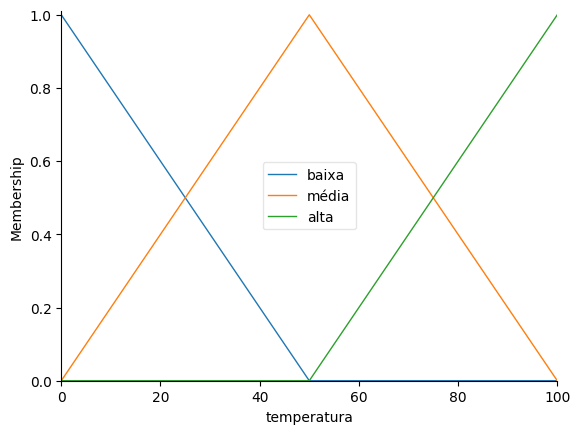

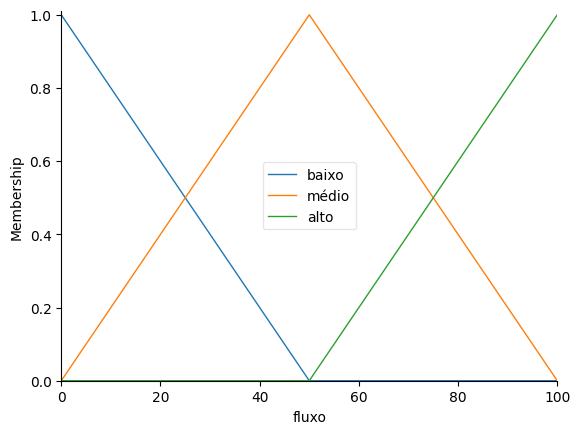

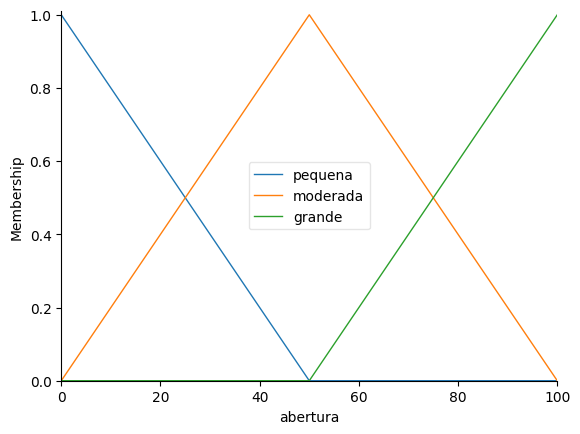

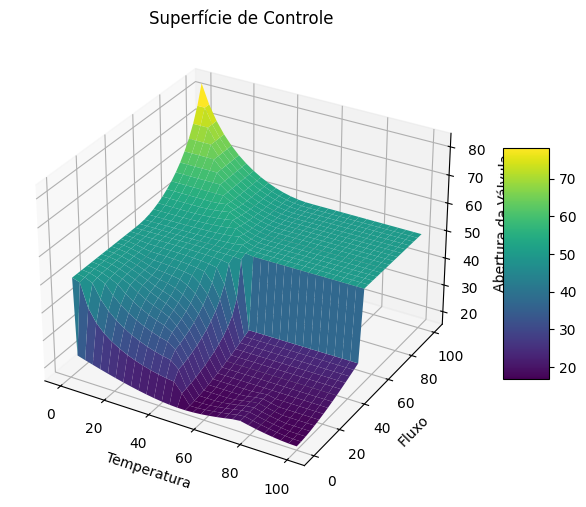

In [10]:
import matplotlib.pyplot as plt

# Visualizar funções de pertinência
temperatura.view()
fluxo.view()
abertura.view()

# Visualizar superfície de controle
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.linspace(0, 100, 30), np.linspace(0, 100, 30))
z = np.zeros_like(x)

for i in range(30):
    for j in range(30):
        simulacao.input['temperatura'] = x[i, j]
        simulacao.input['fluxo'] = y[i, j]
        simulacao.compute()
        if 'abertura' in simulacao.output:
            z[i, j] = simulacao.output['abertura']
        else:
            z[i, j] = np.nan 

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

ax.set_xlabel('Temperatura')
ax.set_ylabel('Fluxo')
ax.set_zlabel('Abertura da Válvula')
ax.set_title('Superfície de Controle')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## 7. Discussão

### Fuzzificação
As funções de pertinência usadas na fuzzificação são triangulares (trimf). Elas foram escolhidas pela sua simplicidade e eficácia em representar conceitos linguísticos como "baixo", "médio" e "alto".

### Inferência
A inferência é realizada usando o método de Mamdani. As regras são avaliadas em paralelo, e os resultados são agregados.

### Defuzzificação
O método de defuzzificação usado é o centroide, que calcula o centro de gravidade da área sob a curva de saída fuzzy agregada.

## 8. Conclusão

Este sistema fuzzy demonstra como podemos controlar a temperatura de um chuveiro usando lógica fuzzy. O sistema considera a temperatura atual e o fluxo de água para determinar a abertura adequada da válvula de água quente. A abordagem fuzzy permite lidar com a incerteza e a imprecisão inerentes a este tipo de controle, resultando em um sistema mais flexível e intuitivo em comparação com métodos de controle tradicionais.